In [1]:
import pixiedust
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

Pixiedust database opened successfully


In [6]:
trx  = pd.read_csv("TrxEmpresariales_Jun17_Ctes_F2_ad.csv")#pixiedust("TrxEmpresariales_Jun17_Ctes_F2_ad.csv")
trx.head()

,FEC_SOLI_TRN,IMP_TRANS,NU_CTE,NU_CTE_RECIBE
0,29APR2017,58.00,000DF8FD,B66DD83D
1,28OCT2016,149.77,000DF8FD,D3IB3P0F
2,12OCT2016,151.82,000DF8FD,36INDPB3
3,24NOV2016,185.23,000DF8FD,D3IB3P0F
4,26DEC2016,212.98,000DF8FD,6P0FF6P8



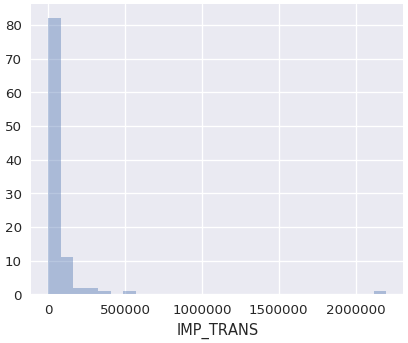

In [7]:
display(trx)

In [9]:
edges = trx.groupby(["NU_CTE", "NU_CTE_RECIBE"])[["IMP_TRANS"]].mean()
edges

IMP_TRANS
NU_CTE   NU_CTE_RECIBE              
000DF8FD 000DF8FD       4.143324e+03
         0066333F       5.500000e+02
         30PI883F       9.668203e+03
         33B8IBBI       3.828200e+02
         36INDPB3       1.518200e+02
         3DF8I0D6       5.085542e+04
         3F3FNFD6       4.766872e+03
         3F6I08F0       2.110630e+03
         3F8D8B3P       6.292649e+04
         3FP0FI0N       1.745680e+05
         3NB666ID       5.162000e+03
         3P86FNNB       1.436892e+04
         4IP8PFDD       4.535431e+04
         63BNF660       4.748281e+04
         6P0FF6P8       5.841396e+03
         6P0IPBD6       3.858620e+03
         83F8663I       1.148997e+03
         B66DD83D       9.585263e+02
         D0I83PFD       4.595147e+03
         D336P6DF       1.962912e+04
         D3B6BD0F       1.366480e+03
         D3IB3P0F       4.691432e+03
         D3PFI08B       2.071160e+03
         DBFP0BF6       4.157633e+03
         DDBIFF80       2.552000e+04
         DDP06INB       1.003371e+04
         F600PBN8       3.312941e+04
         INBNFB6D       1.044000e+03
         N0D3FN8F       1.188569e+04
         N63FNIIN       1.508435e+04
...                              ...
XNPI6BI8 X8IDI08N       5.441200e+04
         XB0FN3BN       2.473120e+03
         XB68NPIN       3.000000e+04
         XBDP30FN       5.027383e+03
         XD6PI083       1.349655e+05
         XDD330B6       3.135942e+04
         XDDB3FIB       1.800000e+05
         XDPDF3FD       8.349208e+03
         XDPF03IF       6.380000e+03
         XIIDPFND       7.268925e+05
         XIIINI00       1.810000e+04
         XN06D0NN       3.480000e+03
         XNB3DNBI       2.138300e+03
         XNI88NDI       4.100000e+04
         XNND0IIP       1.740000e+03
XNPIIFBN 6B88860I       3.750000e+04
         83D00PBN       3.000000e+03
         X3BBP8N8       1.050000e+06
XNPINPIP 388FFBIP       1.148400e+03
         4F8BBNN3       2.550000e+04
         4NIP0I0P       3.600000e+03
         D86NNB0F       1.113044e+04
         I8BI6DI3       1.523050e+04
         P36D66F3       7.743900e+03
         X008B0IF       1.926193e+03
         X0N3DD0D       2.373300e+03
         XBD8F83F       1.524543e+04
         XD033N00       1.753590e+03
         XI38P0I6       1.386080e+03
XP0363N0 N0F03B6F       2.900000e+02

[53659 rows x 1 columns]

In [10]:
edges = edges.reset_index()
edges

,NU_CTE,NU_CTE_RECIBE,IMP_TRANS
0,000DF8FD,000DF8FD,4.143324e+03
1,000DF8FD,0066333F,5.500000e+02
2,000DF8FD,30PI883F,9.668203e+03
3,000DF8FD,33B8IBBI,3.828200e+02
4,000DF8FD,36INDPB3,1.518200e+02
5,000DF8FD,3DF8I0D6,5.085542e+04
6,000DF8FD,3F3FNFD6,4.766872e+03
7,000DF8FD,3F6I08F0,2.110630e+03
8,000DF8FD,3F8D8B3P,6.292649e+04
9,000DF8FD,3FP0FI0N,1.745680e+05


In [11]:
trx_graph = nx.from_pandas_edgelist(
    trx, "NU_CTE", "NU_CTE_RECIBE", "IMP_TRANS", 
    create_using = nx.DiGraph() )

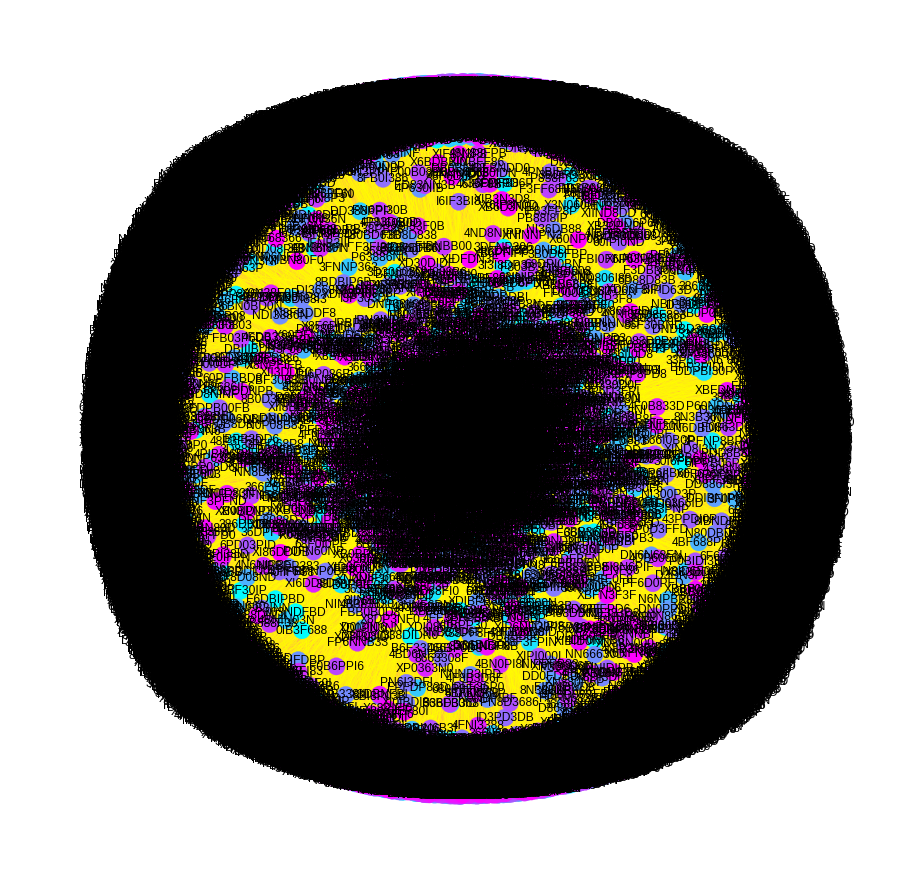

In [12]:
import  matplotlib.cm  as cm
fig = plt.figure(figsize = (12,12))
nx.draw(trx_graph, arrows=True, with_labels=True, width = 0.5,style="dotted",
        node_color=range(len(trx_graph)), cmap=cm.get_cmap(name="cool"),
        edge_color=range(len(trx_graph.edges)), edge_cmap=cm.get_cmap(name="spring"),
        #pos = nx.random_layout(flight_graph)
       )
plt.show()

In [23]:
degree_df = pd.DataFrame([{"NU_CTE":k, "DEGREE":v} for k,v in trx_graph.degree], columns=["NU_CTE", "DEGREE"])
ctes=trx[["NU_CTE","IMP_TRANS"]].groupby(["NU_CTE"],as_index=False)["IMP_TRANS"].mean()
trx_centrality = pd.merge(ctes, degree_df, on='NU_CTE')
trx_centrality

,NU_CTE,IMP_TRANS,DEGREE
0,000DF8FD,17022.032835,44
1,003NDFBD,21643.901852,13
2,00DIII63,104819.745263,15
3,00F0BND8,25968.783056,30
4,0336FNP3,11982.861500,6
5,03886I8N,33731.797778,15
6,03NBN6P8,146637.852609,38
7,0836NP36,3070.133333,2
8,08D3FDD3,31517.804317,65
9,08IPD86I,13689.064182,32


In [28]:
from six import iteritems
def compute_centrality(g, centrality_df, compute_fn, col_name, *args, **kwargs): 
    # create a temporary DataFrame that contains the computed centrality values
    temp_df = pd.DataFrame(
        [{"NU_CTE":k, col_name:v} for k,v in iteritems(compute_fn(g, *args, **kwargs))], 
        columns=["NU_CTE", col_name]
    )
    # make sure to remove the col_name from the centrality_df is already there
    if col_name in centrality_df.columns:
        centrality_df.drop([col_name], axis=1, inplace=True)
    # merge the 2 DataFrame on the IATA_CODE column
    centrality_df = pd.merge(centrality_df, temp_df, on='NU_CTE')
    return centrality_df

In [30]:
%%time
trx_centrality = compute_centrality(trx_graph, trx_centrality, nx.pagerank, "PAGE_RANK")
trx_centrality = compute_centrality(trx_graph, trx_centrality, nx.closeness_centrality, "CLOSENESS")
trx_centrality = compute_centrality(
    trx_graph, trx_centrality, nx.betweenness_centrality, "BETWEENNESS", k = len(trx_graph))
trx_centrality

CPU times: user 43min 53s, sys: 2.21 s, total: 43min 55s
Wall time: 43min 53s


In [31]:
trx_centrality

,NU_CTE,IMP_TRANS,DEGREE,PAGE_RANK,CLOSENESS,BETWEENNESS
0,000DF8FD,17022.032835,44,0.000030,0.000030,1.860499e-05
1,003NDFBD,21643.901852,13,0.000037,0.009212,5.400119e-06
2,00DIII63,104819.745263,15,0.000034,0.010086,1.256895e-05
3,00F0BND8,25968.783056,30,0.000042,0.008533,5.001891e-05
4,0336FNP3,11982.861500,6,0.000028,0.000000,0.000000e+00
5,03886I8N,33731.797778,15,0.000035,0.007508,1.886536e-04
6,03NBN6P8,146637.852609,38,0.000043,0.009796,3.804216e-05
7,0836NP36,3070.133333,2,0.000028,0.005915,1.629020e-06
8,08D3FDD3,31517.804317,65,0.000032,0.008160,2.824748e-04
9,08IPD86I,13689.064182,32,0.000028,0.000000,0.000000e+00


In [32]:
nx.pagerank(trx_graph)

{'000DF8FD': 2.9518573449559272e-05,
 'B66DD83D': 2.8144681470300736e-05,
 'D3IB3P0F': 3.739483414806073e-05,
 '36INDPB3': 3.51698400593034e-05,
 '6P0FF6P8': 2.8442054620659307e-05,
 '30PI883F': 3.122078530968236e-05,
 'X38PNNDI': 2.8144681470300736e-05,
 'D336P6DF': 4.598517324941047e-05,
 '33B8IBBI': 2.8659043356260345e-05,
 '0066333F': 2.8144681470300736e-05,
 'D3PFI08B': 2.90396516291447e-05,
 '3F3FNFD6': 3.5457267410940975e-05,
 'D0I83PFD': 4.464547897170612e-05,
 'DBFP0BF6': 3.50305371794387e-05,
 'INBNFB6D': 2.8144681470300736e-05,
 '3NB666ID': 2.981268898947798e-05,
 '83F8663I': 3.381091469197011e-05,
 '3F6I08F0': 4.067599696061264e-05,
 'X00DBDF0': 3.0282032089872483e-05,
 'D3B6BD0F': 4.251187776917582e-05,
 'X638FN0P': 3.475095382007796e-05,
 'N63FNIIN': 2.9753156837321496e-05,
 'N0D3FN8F': 3.0479355637156687e-05,
 '3F8D8B3P': 3.079292236866675e-05,
 'PB638D83': 2.9142802970187964e-05,
 'N6DDFN08': 2.9711944954050024e-05,
 'X0DBDNB0': 3.8188774075272116e-05,
 '3DF8I0D6': 2.94

In [33]:
for col_name in ["DEGREE", "PAGE_RANK", "CLOSENESS", "BETWEENNESS"]:
    print("{} : {}".format(
        col_name,
        trx_centrality.nlargest(10, col_name)["NU_CTE"].values)
    )

DEGREE : ['X3P86I00' 'I08D0P60' 'F686P066' '36NDPBF8' 'FB38DDFD' '36DN8DF0'
 'D8F6P6BB' '86P68N6B' '3F368P0D' 'D336P6DF']
PAGE_RANK : ['IN6PP68I' 'D8F6P6BB' '36BF0P83' 'FIB068FN' 'XD8N8B6D' 'FPFN6838'
 'NI3PPF88' 'D0P0F0F8' 'X6386F03' 'X83N86I3']
CLOSENESS : ['8PPNDN86' '80NDBNNI' 'BPDP68BI' 'IN6PP68I' '3FPFI0DB' 'DD3D6NII'
 '3F368P0D' 'XDIIDIDP' '3P6NB838' 'DI83I38N']
BETWEENNESS : ['F686P066' 'D8F6P6BB' '6B6FP303' 'X3P86I00' 'DN8NBB36' 'D3IN86ND'
 'BPDP68BI' '3F368P0D' 'IDB60FPF' 'F03P330N']


In [36]:
import matplotlib.cm as cm
def visualize_neighbors(parent_node):
    fig = plt.figure(figsize = (12,12))
    # Create a subgraph and add an edge from the parents node to all its neighbors
    graph = nx.DiGraph()
    for neighbor in trx_graph.neighbors(parent_node):
        graph.add_edge(parent_node, neighbor)
    # draw the subgraph
    nx.draw(graph, arrows=True, with_labels=True, width = 0.5,style="dotted",
            node_color=range(len(graph)), cmap=cm.get_cmap(name="cool"),
            edge_color=range(len(graph.edges)), edge_cmap=cm.get_cmap(name="spring"),
           )
    plt.show()

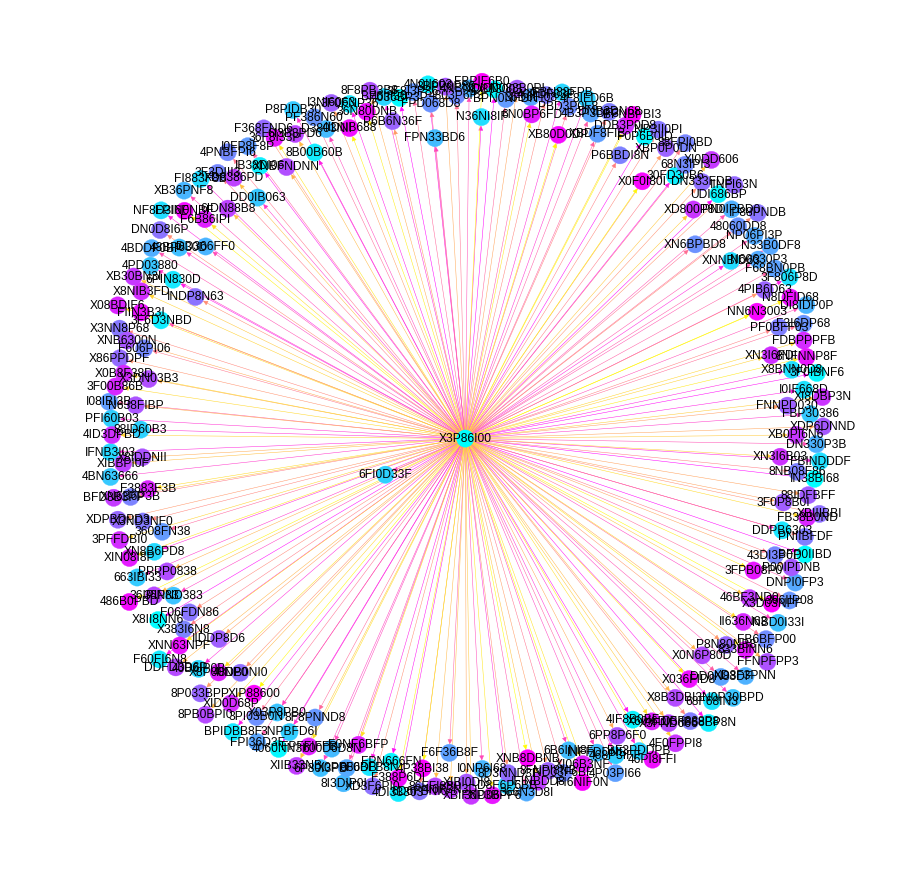

In [37]:
visualize_neighbors('X3P86I00')

In [68]:
nx.dijkstra_path(trx_graph, 'X3P86I00', 'F03P330N', weight="CLOSENESS")#"DEGREE","PAGE_RANK","CLOSENESS"

['X3P86I00', '3F0P8B0I', '6B6FP303', 'BF363B6D', 'F03P330N']

In [70]:
# use a cache so we don't recompute the weight for the same airport every time
cache = {}
def compute_weight(centrality_indice_col):
    # wrapper function that conform to the dijkstra weight argument
    def wrapper(source, target, attribute):
        # try the cache first and compute the weight if not there
        source_weight = cache.get(source, None)
        if source_weight is None:
            # look up the airports_centrality for the value
            source_weight = trx_centrality.loc[trx_centrality["NU_CTE"] == source][centrality_indice_col].values[0]
            cache[source] = source_weight
        target_weight = cache.get(target, None)
        if target_weight is None:
            target_weight = trx_centrality.loc[trx_centrality["NU_CTE"] == target][centrality_indice_col].values[0]
            cache[target] = target_weight
        # Return weight is inversely proportional to the computed weighted since the 
        # Dijkstra algorithm give precedence to shorter distances
        return float(1/source_weight) + float(1/target_weight)
    return wrapper

In [75]:

for  col_name in  [["DEGREE","PAGE_RANK","CLOSENESS"]]:
    cache.clear() 
    print("{} : {}".format(col_name,nx.dijkstra_path(trx_graph, "X3P86I00","F03P330N", weight=compute_weight(col_name))))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [65]:
trx_centrality.loc[trx_centrality["NU_CTE"] == 'XN8FIBFP']["DEGREE"].values[0]#"DEGREE","PAGE_RANK","CLOSENESS"

89